<a href="https://colab.research.google.com/github/Vishalkumar8434076/data-analysis-project/blob/main/hotel_booking_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [2]:
df=pd.read_csv("/content/hotel_bookings 2.csv")

Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
36560,Resort Hotel,0,11,2017,May,20,18,2,4,2,...,No Deposit,241.0,NaN,0,Transient,72.67,0,1,Check-Out,24/5/2017
36561,Resort Hotel,0,107,2017,May,20,20,2,2,2,...,No Deposit,410.0,NaN,0,Transient,47.50,0,1,Check-Out,24/5/2017
36562,Resort Hotel,0,168,2017,May,20,15,3,6,2,...,No Deposit,163.0,NaN,0,Transient,84.45,0,0,Check-Out,24/5/2017
36563,Resort Hotel,0,1,2017,May,21,23,0,1,2,...,No Deposit,250.0,NaN,0,Transient,97.00,1,1,Check-Out,24/5/2017
36564,Resort Hotel,0,255,2017,May,20,17,2,5,2,...,No Deposit,240.0,NaN,0,Transient,83.00,0,1,NaN,NaN


In [5]:
df.shape

(36565, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36565 entries, 0 to 36564
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           36565 non-null  object 
 1   is_canceled                     36565 non-null  int64  
 2   lead_time                       36565 non-null  int64  
 3   arrival_date_year               36565 non-null  int64  
 4   arrival_date_month              36565 non-null  object 
 5   arrival_date_week_number        36565 non-null  int64  
 6   arrival_date_day_of_month       36565 non-null  int64  
 7   stays_in_weekend_nights         36565 non-null  int64  
 8   stays_in_week_nights            36565 non-null  int64  
 9   adults                          36565 non-null  int64  
 10  children                        36565 non-null  int64  
 11  babies                          36565 non-null  int64  
 12  meal                            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format="%d/%m/%Y")

In [9]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,36565,36565,36565,36101,36565,36565,36565,36565,36565,36565,36564
unique,1,12,5,121,6,4,10,11,3,4,3
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,36565,3845,27470,16739,15925,26164,21783,15687,34705,27545,25443


In [ ]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

In [ ]:
df.isnull().sum()

dtype: int64

In [11]:
df.drop(['agent','company'],axis=1, inplace=True)
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100.000000,36100
mean,0.306814,90.684571,2016.039003,27.100249,15.737562,1.174321,3.090499,1.861911,0.121994,0.013241,0.048366,0.111773,0.142493,0.279446,0.579612,89.583882,0.131967,0.584709,2016-06-25 09:53:42.648199680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,10.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.735000,0.000000,0.000000,2016-01-10 00:00:00
50%,0.000000,55.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-06-24 00:00:00
75%,1.000000,150.000000,2017.000000,39.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000,1.000000,2016-12-26 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.000000,2017-09-09 00:00:00
std,0.461178,96.342739,0.701119,14.562214,8.864924,1.141065,2.445785,0.719940,0.435951,0.115752,0.214541,1.405628,0.977899,0.713259,7.788223,57.682234,0.344784,0.789765,NaN


In [14]:
df=df[df['adr']<5000]

is_canceled
0    0.693186
1    0.306814
Name: proportion, dtype: float64


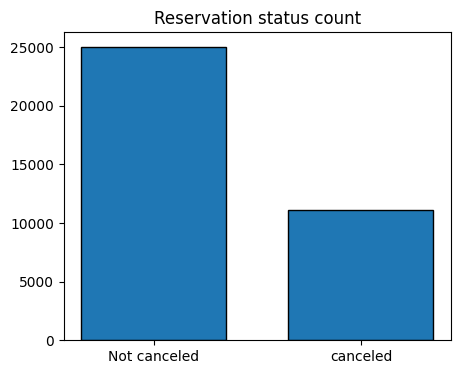

In [16]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor = 'k', width=0.7)
plt.show()

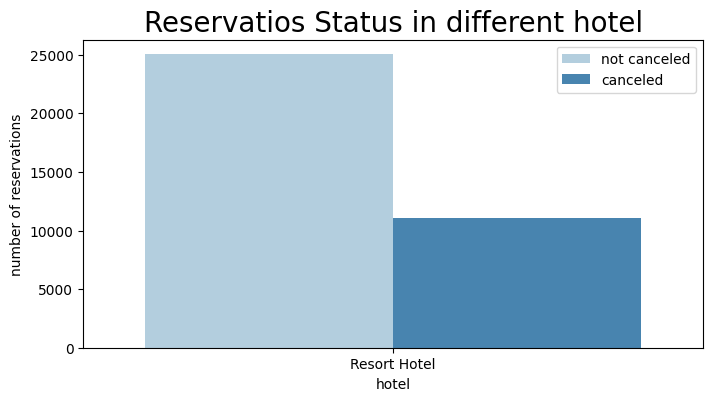

In [17]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x='hotel',hue= 'is_canceled', data= df, palette= 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservatios Status in different hotel', size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [18]:
resort_hotel= df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.693186
1,0.306814


In [19]:
city_hotel= df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,


In [20]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

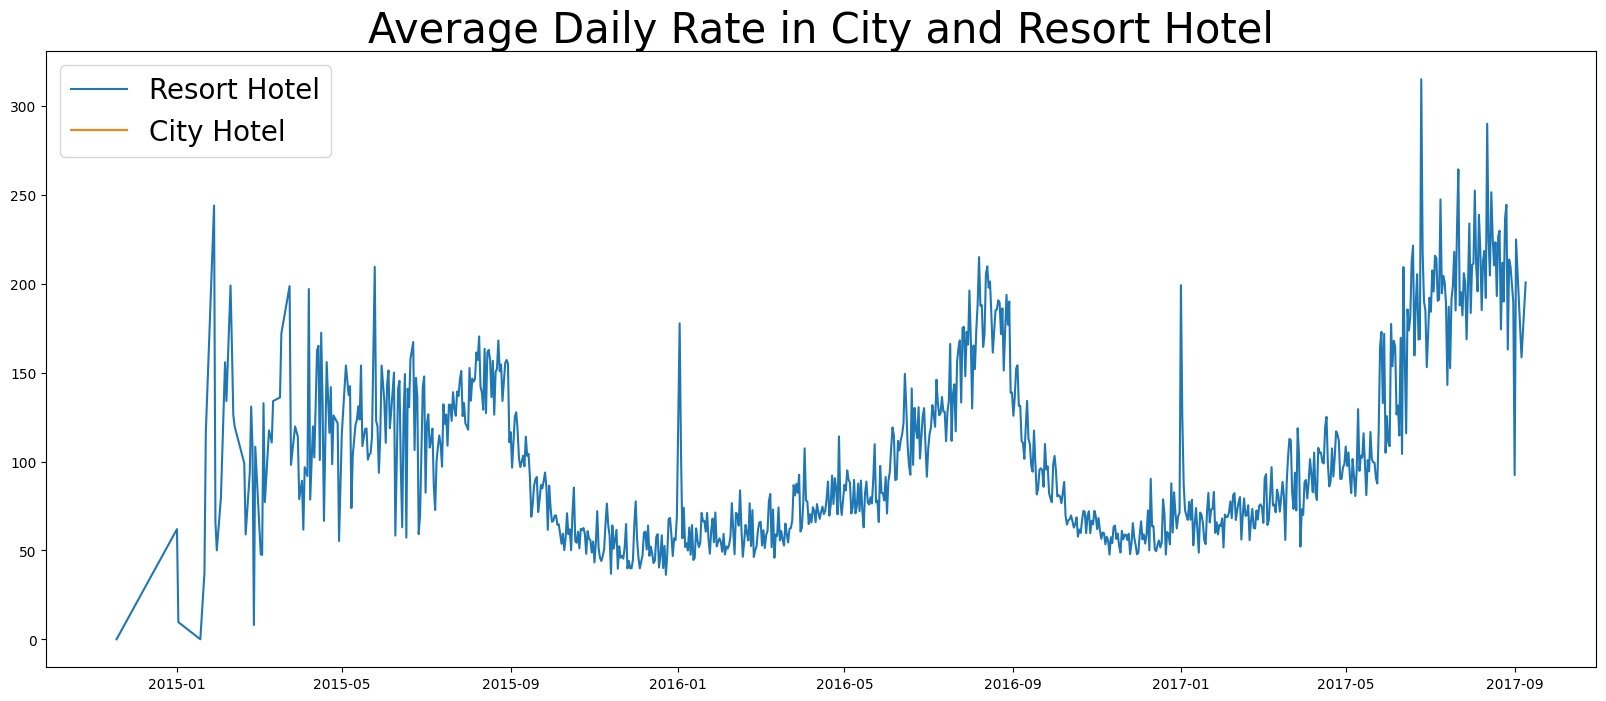

In [21]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label= 'City Hotel')
plt.legend(fontsize=20)
plt.show()

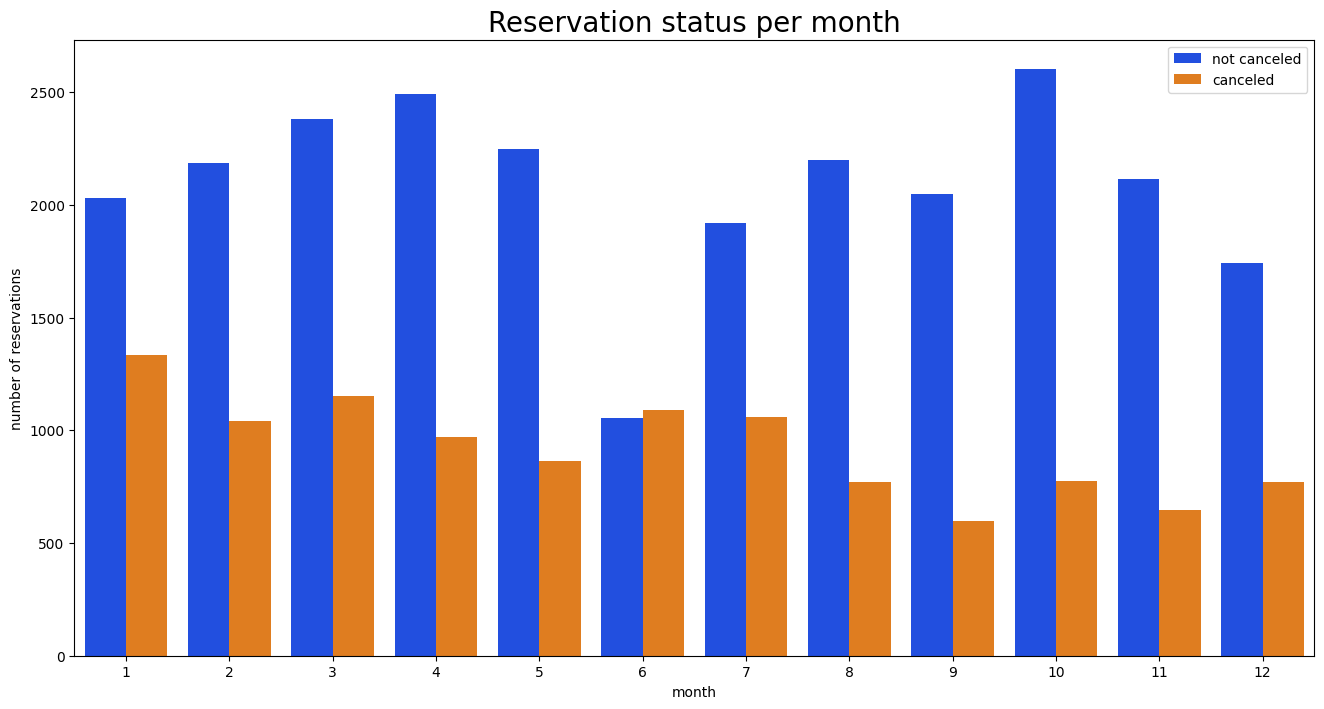

In [22]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

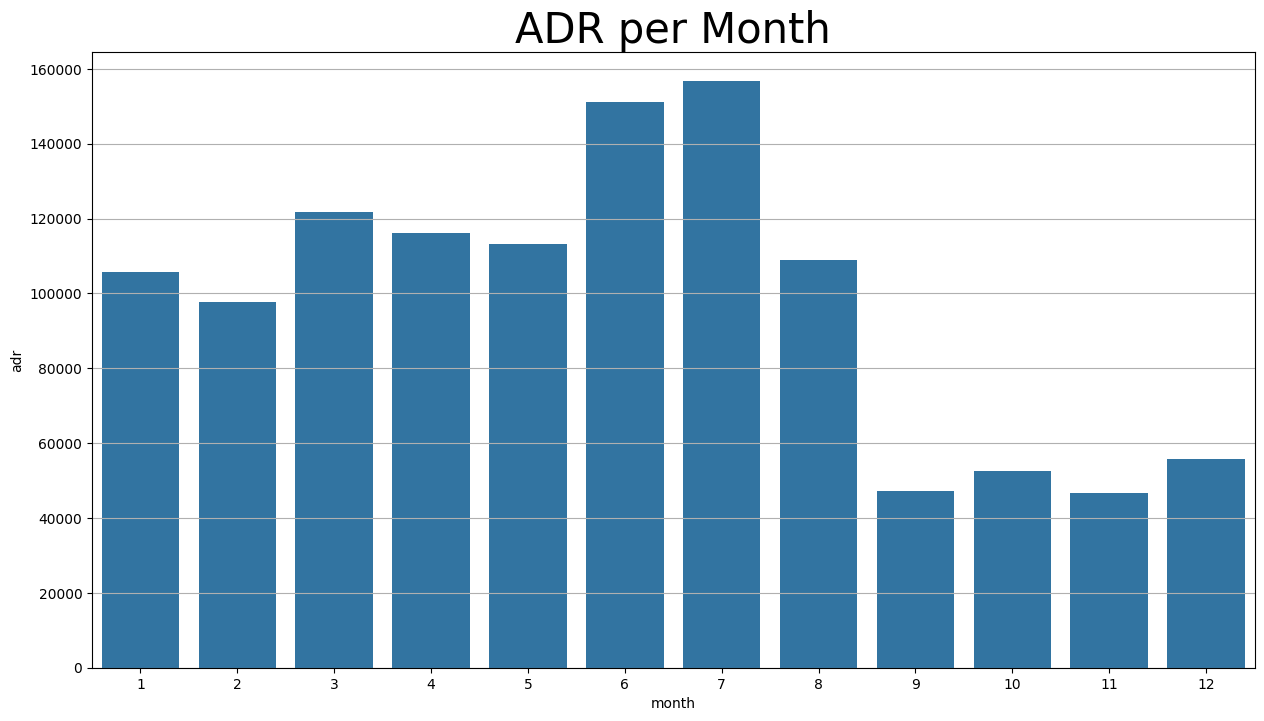

In [23]:
plt.figure(figsize=(15,8))
plt.title('ADR per Month', fontsize=30)
plt.grid()
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

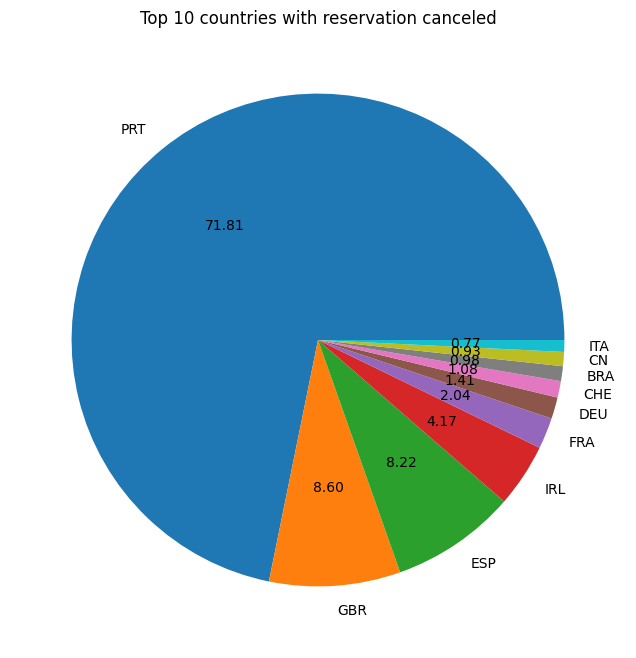

In [24]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [25]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,15850
Offline TA/TO,6594
Groups,5732
Direct,5663
Corporate,2079
Complementary,182


In [26]:
df['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.439058
Offline TA/TO,0.182659
Groups,0.158781
Direct,0.156870
Corporate,0.057590
Complementary,0.005042


In [27]:
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.564103
Groups,0.223366
Offline TA/TO,0.100939
Direct,0.078097
Corporate,0.030516
Complementary,0.002979


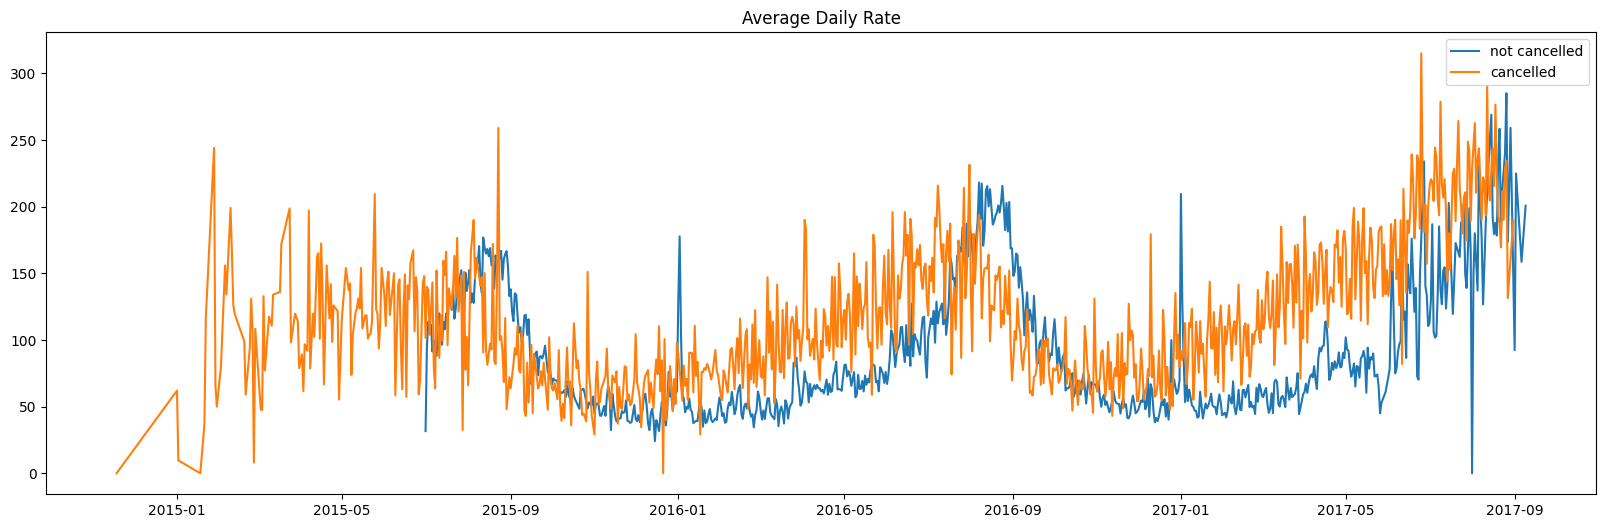

In [28]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()